# Final Project Morrison

Link to the Kaggle Dataset:
https://www.kaggle.com/datasets/emreksz/software-engineer-jobs-and-salaries-2024

Link to GitHub Repo:


# Problem Description

A common issue that potential employees run into when searching for jobs is not knowing the salaries of some of the positions in which the candidate is interested. There are still a significant number of job postings where companies do not give an expectation of a salary for the position in the job posting. This can be very frustrating, especially when a candidate finds a job in which they are very interested and spends the time applying and interviewing just to find out in the end that the employer and employee had a vast difference in salary expectations. 

In this project, I analyze a medium size dataset of Software Engineering Salaries in 2024 by performing exploratory data analysis (EDA), creating four models that predict software engineering salaries by considering company score, location, and job title as features, and drawing conclusions from the results. By creating a ML model, I hope that given common information in jop postings, an accurate salary prediction could be made for the position. For this problem, I utilized feature engineering to split the job title into multiple features, consisting of role, seniority, and specialization. I am curious about how the models will be able to perform since this is a regression problem and most of the features are categorical. 

In [878]:
# Import the proper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
import scipy.stats as stats
from scipy.stats import norm
import re
import us

# Exploratory Data Analysis

Before building my models to predict the data, I inspect the data and clean it to prepare it for the Machine Learning Algorithms I will implement.

In [860]:
df = pd.read_csv(r'Data/Software Engineer Salaries.csv')

In [861]:
df.head(10)

,Company,Company Score,Job Title,Location,Date,Salary
0,ViewSoft,4.8,Software Engineer,"Manassas, VA",8d,$68K - $94K (Glassdoor est.)
1,Workiva,4.3,Software Support Engineer,Remote,2d,$61K - $104K (Employer est.)
2,"Garmin International, Inc.",3.9,C# Software Engineer,"Cary, NC",2d,$95K - $118K (Glassdoor est.)
3,Snapchat,3.5,"Software Engineer, Fullstack, 1+ Years of Expe...","Los Angeles, CA",2d,$97K - $145K (Employer est.)
4,Vitesco Technologies Group AG,3.1,Software Engineer,"Seguin, TX",2d,$85K - $108K (Glassdoor est.)
5,Spotify,3.9,Backend Engineer II,"New York, NY",1d,$123K - $175K (Employer est.)
6,Infor,4.0,Associate Software Engineer,"Alpharetta, GA",7d,$77K - $94K (Glassdoor est.)
7,Amerisoft Corporation,5.0,Software Developers,"Farmington Hills, MI",30d+,$71K - $100K (Glassdoor est.)
8,WHOOP,3.3,"Software Engineer II (Backend, Health)","Boston, MA",10d,$94K - $148K (Glassdoor est.)
9,PFF,4.2,Sr. Software Engineer,Remote,1d,$147K - $189K (Employer est.)


In [862]:
df.tail(10)

,Company,Company Score,Job Title,Location,Date,Salary
860,Westchester Community College,NaN,Software Development Engineer in Test,"San Francisco, CA",30d+,NaN
861,DPS Telecom,NaN,Software & System Dev. Sr. Engineer,"Raymond, OH",30d+,NaN
862,Roblox,NaN,Software Engineer II,"Valhalla, NY",3d,NaN
863,OpenAI,NaN,Embedded Software Engineer (Entry-Level),"Lake Hopatcong, NJ",2d,NaN
864,"Akina, Inc.",NaN,Senior Software Engineer - App Orchestration,"San Mateo, CA",30d+,NaN
865,RXO,NaN,"Software Engineer, Machine Learning Compute","San Francisco, CA",6d,NaN
866,Infosys,NaN,Software Engineer - 3 (Apache NiFi),"Annapolis Junction, MD",18d,NaN
867,Medtronic,NaN,Senior Software Engineer,"Southfield, MI",19d,NaN
868,NaN,NaN,Junior Python Developer,"Charlotte, NC",2d,NaN
869,NaN,NaN,GUI Software Engineer II - Surgical Robotics,"Boston, MA",10d,NaN


In [863]:
df.shape

(870, 6)

In [864]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        868 non-null    object 
 1   Company Score  789 non-null    float64
 2   Job Title      870 non-null    object 
 3   Location       857 non-null    object 
 4   Date           870 non-null    object 
 5   Salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


In [865]:
df.describe(include='all')

,Company,Company Score,Job Title,Location,Date,Salary
count,868,789.000000,870,857,870,764
unique,648,NaN,542,329,31,680
top,CVS Health,NaN,Software Engineer,United States,30d+,$120K - $150K (Employer est.)
freq,9,NaN,156,48,206,5
mean,NaN,3.895311,NaN,NaN,NaN,NaN
std,NaN,0.524952,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,3.600000,NaN,NaN,NaN,NaN
50%,NaN,3.900000,NaN,NaN,NaN,NaN
75%,NaN,4.200000,NaN,NaN,NaN,NaN


In [866]:
# Extract the salary information, transform the range into a single number via averaging, and convert to an int
def clean_salary(salary_str):
    salary_range = re.findall(r'\$([\dK]+)', salary_str)
    salary_range = [int(s.replace('K', '')) * 1000 for s in salary_range]
    if len(salary_range) == 1:
        return salary_range[0]
    elif len(salary_range) > 1:
        return np.mean(salary_range)
    else:
        return None

df['Salary'] = df['Salary'].astype(str)
df['Mean Salary'] = df['Salary'].apply(lambda x: pd.Series(clean_salary(x)))

def extract_seniority(title):
    seniority_terms = ['Junior', 'Senior', 'Lead', 'Manager', 'Associate']
    for term in seniority_terms:
        if term in title:
            return term
    return 'Unknown'

def extract_role(title):
    role_terms = ['Engineer', 'Developer', 'Scientist', 'Analyst', 'Architect']
    for term in role_terms:
        if term in title:
            return term
    return 'Unknown'

def extract_specialization(title):
    # Customize this list based on your data
    specialization_terms = ['Fullstack', 'Backend', 'Frontend', 'Data', 'C#', 'Java', 'Python']
    for term in specialization_terms:
        if term in title:
            return term
    return 'Unknown'

# Apply these functions to the job titles
df['Seniority'] = df['Job Title'].apply(extract_seniority)
df['Role'] = df['Job Title'].apply(extract_role)
df['Specialization'] = df['Job Title'].apply(extract_specialization)

# Extract the City, State, and Remote data
def clean_location(location):
    
    def state_name_abbr_conversion(state_name):
        state = us.states.lookup(state_name)
        return state.abbr if state else None
    
    if location == None:
        return None, None, None
    area = location.split(',')
    if len(area) == 2:
        city = area[0].strip()
        state = area[1].strip()
        remote = False
    elif 'Remote' or 'United States' in location:
        city, state = None, None
        remote = True
    else:
        city, state = None, state_name_abbr_conversion(location)
        remote = False
    return city, state, remote

df['Location'] = df['Location'].astype(str)
df[['City', 'State', 'Remote']] = df['Location'].apply(lambda x: pd.Series(clean_location(x)))

# Make a data frame with the Mean Salary, City, State, Company Score, Company, and Remote Data
clean_df = df.drop(['Job Title', 'Location', 'Salary', 'Date'], axis=1)

In [867]:
clean_df

,Company,Company Score,Mean Salary,Seniority,Role,Specialization,City,State,Remote
0,ViewSoft,4.8,81000.0,Unknown,Engineer,Unknown,Manassas,VA,False
1,Workiva,4.3,82500.0,Unknown,Engineer,Unknown,None,None,True
2,"Garmin International, Inc.",3.9,106500.0,Unknown,Engineer,C#,Cary,NC,False
3,Snapchat,3.5,121000.0,Unknown,Engineer,Fullstack,Los Angeles,CA,False
4,Vitesco Technologies Group AG,3.1,96500.0,Unknown,Engineer,Unknown,Seguin,TX,False
...,...,...,...,...,...,...,...,...,...
865,RXO,NaN,NaN,Unknown,Engineer,Unknown,San Francisco,CA,False
866,Infosys,NaN,NaN,Unknown,Engineer,Unknown,Annapolis Junction,MD,False
867,Medtronic,NaN,NaN,Senior,Engineer,Unknown,Southfield,MI,False
868,NaN,NaN,NaN,Junior,Developer,Python,Charlotte,NC,False


In [868]:
# Remove the null rows from the data or fill in with default data
clean_df['City'] = clean_df['City'].fillna("Unknown")
clean_df['State'] = clean_df['State'].fillna("Unknown")
clean_df['Company'] = clean_df['Company'].fillna("Unknown")
clean_df = clean_df.dropna(subset=['Mean Salary', 'Company Score'])
print(f'isna:\n{clean_df.isna().sum()}\n')
print(f'isnull:\n{clean_df.isnull().sum()}')
clean_df.shape

isna:
Company           0
Company Score     0
Mean Salary       0
Seniority         0
Role              0
Specialization    0
City              0
State             0
Remote            0
dtype: int64

isnull:
Company           0
Company Score     0
Mean Salary       0
Seniority         0
Role              0
Specialization    0
City              0
State             0
Remote            0
dtype: int64


(764, 9)

# Model Building and Analysis

Here I begin to build four models to predict the salary label based off the features company score and state/remote.

## Basic Linear Regressor

In [869]:
# Linear Regression Model
# Encode categorical variables
clean_df = pd.get_dummies(clean_df, columns=['Remote', 'City', 'Specialization', 'Role'], drop_first = True)

label_encoder = LabelEncoder()
clean_df['Seniority'] = label_encoder.fit_transform(clean_df['Seniority'])

# Define the variables for the linear model
X = clean_df.drop(columns=['State', 'Mean Salary', 'Company'])
y = clean_df['Mean Salary']

# Ensure compatibility with statsmodels
X = X.astype(float)
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Add constants to the feature data
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

linear_model = sm.OLS(y_train, X_train).fit()
print(f'Model Summary:\n{linear_model.summary()}')

y_pred_te = linear_model.predict(X_test)
mse_te_lr = mean_squared_error(y_pred_te, y_test)
print(f'\nTest Mean Squared Error is: {mse_te_lr}')

y_pred_tr = linear_model.predict(X_train)
mse_tr_lr = mean_squared_error(y_pred_tr, y_train)
print(f'Train Mean Squared Error is: {mse_tr_lr}\n')

r2_lr = linear_model.rsquared

Model Summary:
                            OLS Regression Results                            
Dep. Variable:            Mean Salary   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.9189
Date:                Wed, 11 Sep 2024   Prob (F-statistic):              0.761
Time:                        10:04:42   Log-Likelihood:                -7301.5
No. Observations:                 611   AIC:                         1.508e+04
Df Residuals:                     371   BIC:                         1.614e+04
Df Model:                         239                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const  

## Forward Selection Method
Here I will use forward selection to attempt to improve the R^2 and MSE value from the model that included all the features

In [838]:
# Convert to DataFrame for feature selection
# Initialize an empty model with only the intercept
initial_features = []
remaining_features = X_train.columns.tolist()
best_mse_lrfs = np.inf  # Initialize with a large value
best_r2_lrfs = -np.inf

# Forward selection process
while remaining_features:
    mse_list = []
    r2_list = []
    for feature in remaining_features:
        # Try adding each feature one by one
        current_features = initial_features + [feature]
        X_train_subset = X_train[current_features]
        
        # Fit the model with the current set of features
        model = sm.OLS(y_train, X_train_subset).fit()
        y_pred = model.predict(X_test[current_features])
        
        # Compute MSE for the test set
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append((feature, mse))
        r2_list.append(model.rsquared)

    # Find the feature that provides the lowest MSE
    best_feature, best_feature_mse = min(mse_list, key=lambda x: x[1])
    best_feature_r2 = max(r2_list)

    if best_feature_r2 > best_r2_lrfs:
        best_r2_lrfs = best_feature_r2
    
    if best_feature_mse < best_mse_lrfs:
        # Add this feature to the model
        initial_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_mse_lrfs = best_feature_mse
    else:
        # Stop if adding more features does not improve the model
        break

print(f"Selected features: {initial_features}")
print(f'best mse: {best_mse_lrfs:.4f}')
print(f'best r2: {best_r2_lrfs:.4f}')


Selected features: ['const', 'Specialization_Frontend', 'City_Chicago', 'Company Score', 'City_Boston', 'City_Pittsburgh', 'City_Alpharetta', 'City_New York', 'City_Palo Alto', 'City_Washington', 'City_Jacksonville', 'City_Deerfield', 'City_Los Angeles', 'City_Melbourne', 'City_Denver', 'City_Seattle', 'City_Cary', 'City_Atlanta', 'City_Annapolis Junction', 'City_Dallas', 'City_Moorpark', 'City_Bellevue', 'City_Salem', 'Specialization_Data', 'Specialization_Unknown', 'Specialization_Python', 'City_Wilmington', 'City_Albuquerque', 'City_College Park', 'City_Manassas', 'City_Lexington', 'City_West Bend', 'City_Norcross', 'Role_Unknown', 'City_Plainsboro', 'City_Framingham', 'City_Shippensburg', 'City_Northborough', 'City_Fairborn', 'City_Greenwood Village', 'Specialization_Java', 'City_Boulder', 'City_Lenexa', 'City_Olathe', 'City_Warrenton', 'City_Plano', 'City_Phoenix', 'City_Georgetown', 'City_Mountain View', 'City_Jackson', 'City_Chalfont', 'City_Germantown', 'City_Lorton', 'City_Irv

## Support Vector Machine

In [839]:
# Use a Support Vector Machine Classifier to see if there is better performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and fit the SVM model
svm_model = SVR(kernel='poly')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Calculate mean squared error
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f'Mean Squared Error is: {mse_svm}')

# Calculate R^2
r2_svm = r2_score(y_test, y_pred_svm)
print(f'SVM R² Score: {r2_svm:.4f}')

Mean Squared Error is: 2477573340.474337
SVM R² Score: -0.0426


## Random Forest

In [840]:
# Random Forest Predictor
# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=500, random_state=42)

# Fit the model on training data
random_forest.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = random_forest.predict(X_test)

# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')

# Calculate R^2
r2_rf = r2_score(y_test, y_pred_rf)
print(f'RF R² Score: {r2_rf:.4f}')

Random Forest Mean Squared Error: 3283927185.6145163
RF R² Score: -0.3819


## Gradient Boosting

In [841]:
# Gradient Boost Regressor
# Initialize the Gradient Boosting Regressor
gb_rg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.00001, max_depth=7, random_state=42)

# Fit the model on training data
gb_rg.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_rg.predict(X_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gb)
r2_gbr = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting Regressor Mean Squared Error: {mse_gbr:.4f}')
print(f'Gradient Boosting Regressor R² Score: {r2_gbr:.4f}')

Gradient Boosting Regressor Mean Squared Error: 2375646673.7202
Gradient Boosting Regressor R² Score: 0.0003


# Results
Below are a couple of bar charts that displays how the models performed against one another based off their MSE and R^2 values. In addition, a bell curve plotting the residuals for the best model is displayed.

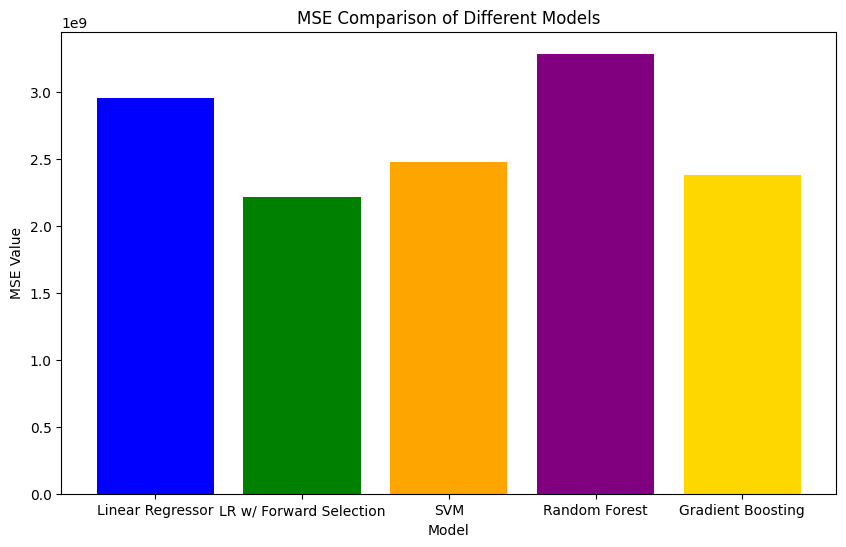

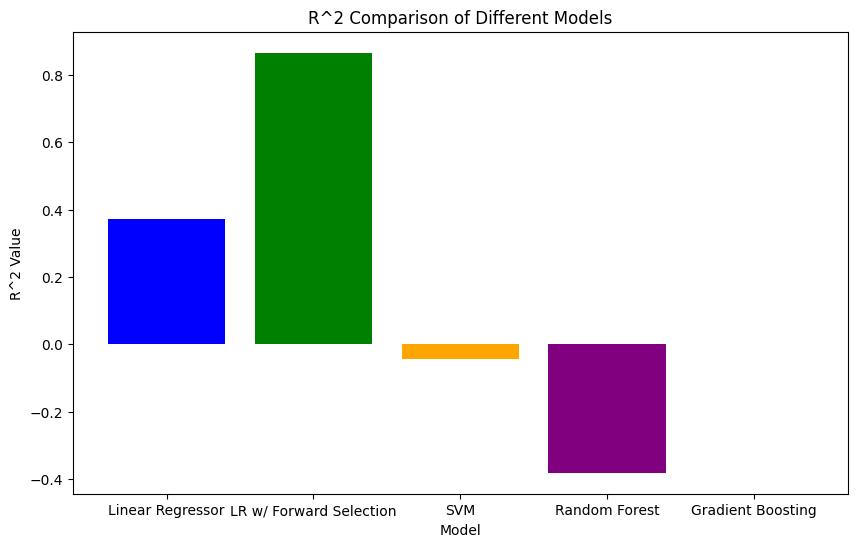

In [842]:
mse_values = [mse_te_lr, best_mse_lrfs, mse_svm, mse_rf, mse_gbr]
r2_values = [r2_lr, best_r2_lrfs, r2_svm, r2_rf, r2_gbr]
model_names = ['Linear Regressor', 'LR w/ Forward Selection', 'SVM', 'Random Forest', 'Gradient Boosting']

# MSE Comparison
plt.figure(figsize=(10,6))
plt.bar(model_names, mse_values, color=['blue', 'green', 'orange', 'purple', 'gold'])

plt.title('MSE Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('MSE Value')

plt.show()

# R^2 comparison
plt.figure(figsize=(10,6))
plt.bar(model_names, r2_values, color=['blue', 'green', 'orange', 'purple', 'gold'])

plt.title('R^2 Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('R^2 Value')

plt.show()

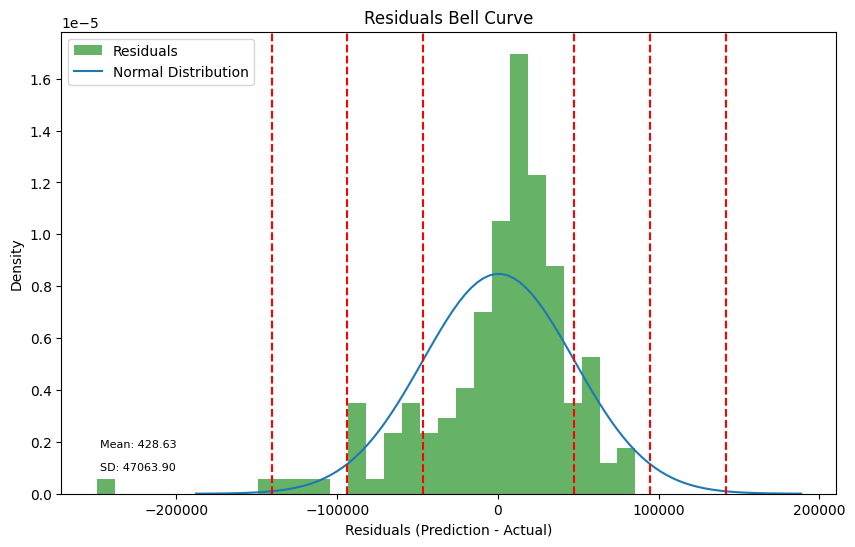

In [899]:
# Re-create the best model, extract the residuals, and plot the bell curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

best_model = sm.OLS(y_train, X_train[initial_features]).fit()
y_pred = best_model.predict(X_test[initial_features])

pred_test_vals = [(y_pred_i, y_test_i) for y_pred_i, y_test_i in zip(y_pred, y_test)]

# residuals (predictions - actual values)
residuals = np.array([pred - actual for pred, actual in pred_test_vals])

# Calculate mean and standard deviation
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)

# Generate x values for the bell curve
x_values = np.linspace(mean_residuals - 4*std_residuals, mean_residuals + 4*std_residuals, 100)

plt.figure(figsize=(10,6))

# Plot the histogram
hist = plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g', label="Residuals")

# Plot the bell curve (normal distribution)
curve, = plt.plot(x_values, norm.pdf(x_values, mean_residuals, std_residuals), label="Normal Distribution")

# Plot vertical lines for standard deviations
for i in range(1, 4):
    line1 = plt.axvline(mean_residuals + i*std_residuals, color='r', linestyle='--', label=f'+{i} SD')
    line2 = plt.axvline(mean_residuals - i*std_residuals, color='r', linestyle='--', label=f'-{i} SD')

plt.annotate(f'Mean: {mean_residuals:.2f}', xy=(0.05, 0.1), xycoords='axes fraction', fontsize=8, color='black')
plt.annotate(f'SD: {std_residuals:.2f}', xy=(0.05, 0.05), xycoords='axes fraction', fontsize=8, color='black')

# customize which parts of the plot appear in the legend
handles, labels = plt.gca().get_legend_handles_labels()

# Filter out unwanted legend labels
desired_handles = [handles[0], handles[1]]  # Only show 'Normal Distribution'
desired_labels = [labels[0], labels[1]]

plt.legend(desired_handles, desired_labels)  # Create the legend with filtered labels

# Show plot
plt.title("Residuals Bell Curve")
plt.xlabel("Residuals (Prediction - Actual)")
plt.ylabel("Density")
plt.show()

# Discussion/Conclusion

The model that performed the best was the Linear Regressor using Forward Selection as the method to select the features. Because I enjoyed working with the linear regressor the most during the class, I decided to focus more attention on preparing this model than the rest of the models. The rest of the models, which included the basic linear regressor, svm, random forest, and gradient boosting ensemble, included all the base features in the training of the model. These models perhaps could be improved by spending more time on the feature selection stage of the model building. Overall, the MSE's for every model is still quite high, which might not lead to practical applications of these models. For example, given that some companies do not give a salary range for their job postings, one of these models could be used to predict the salary based on the job title, location, and company score (which could be looked up online). Nonetheless, the prediction has a significant likelihood of having a large error, rendering the result of the prediction to be untrustworthy. Looking at the bell curve for the Linear Regressor with Forward Selection, the model was off on average by $\$$428.63, which is not bad on the surface, however, the data is spread fairly large with a standard deviation of $\$$47,063.90. This means that approximately 70% of the predictions are within a $\$$47,063.90 tolerance. That being said, there are some significant outliers affecting the bell curve plot in the model. One prediction was about $\$$250,000 off of the actual value. This has a significant impact on the mean and standard deviation.

A way to improve the predictions would be to work on tuning the features more for each model. I spent the most time on the linear regressor, however, perhaps a non-linear fitting with finer tuned features would make much more accurate predictions. Another way to improve these models is to find more important features. For example, one highly correlated feature with salary is years of experience. If the expected 'years of experience' data could be extracted from the job postings, perhaps this would make a better feature than 'job title' which is a categorical feature. More numerical features could be helpful in predicting the salaries rather than the categorical variables that I was able to attain in the dataset.

In conclusion, while the linear regressor model with feature selection performed the best over the rest of the models, it still contained a significant amount of error. While this could introduce a lack of trust in the model's predictions in a real-world scenario, the prediction could still be used as a practical baseline, while the user understands there may be siginifanct error in the prediction.